In [7]:
%matplotlib inline

In [1]:
import time
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

##
from scipy.interpolate import splprep, splev
from scipy.spatial import distance

In [2]:
import sys
sys.path.insert(0, '/Users/hopechen/Documents/projects/git_projects/HCPy/')
sys.path.insert(0, '/Users/hopechen/Documents/projects/git_projects/radfil/')

from HCPy import *
from ShapeStatistics import ShapeStatistics
from radfil import radfil_class, profile_tools

____
# Goal

The goal of this jupyter notebook is to develop a simple function that returns the shape parameters of the spline.  The input is a RadFil object.  This will be merged with the RadFil package when polished.

In [3]:
direcData = '/Users/hopechen/Documents/projects/git_projects/data/'
data = fits.open(direcData+'moment0_11_1stfinger_small.fits')[0]

image, header = data.data, data.header

##
lower = np.percentile(image, 75.)
mask = (image >= lower)

____

## RadFil

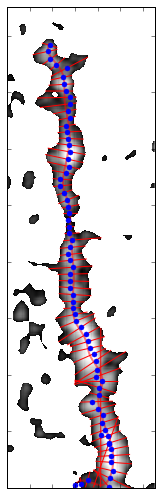

In [9]:
radfil = radfil_class.radfil(image, mask, header = header, distance = 414.)
radfil.make_fil_spine(beamwidth = 6)
radfil.build_profile(cutdist=0.1, samp_int=6, bins=40, shift=True, wrap=False)

____
## ShapeStatistics

In [5]:
stats = ShapeStatistics(radfil)

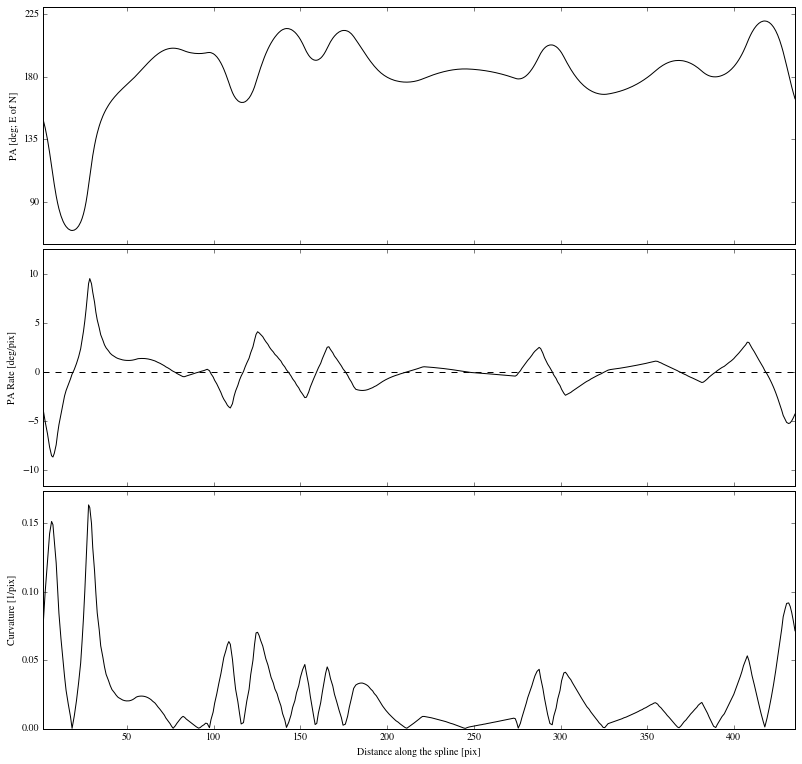

In [8]:
fig, ax = plt.subplots(figsize = (12., 12.),
                       nrows = 3)

# PA
axis = ax[0]
axis.set_ylim(stats.PA.min()-10., stats.PA.max()+10.)
axis.set_xlim(stats.distance.min(), stats.distance.max())
axis.plot(stats.distance, stats.PA, 'k-')
##
axis.set_yticks(np.arange(45.*(axis.get_ylim()[0]//45.+1), axis.get_ylim()[1], 45.))
axis.set_xticklabels([])
axis.set_ylabel('PA [deg; E of N]')

# PA rate
axis = ax[1]
axis.set_ylim(stats.PArate.min()-3., stats.PArate.max()+3.)
axis.set_xlim(stats.distance.min(), stats.distance.max())
axis.plot(stats.distance, stats.PArate, 'k-')
axis.hlines([0.], *axis.get_xlim(),
            linestyle = '--')
##
axis.set_yticks(np.arange(5.*(axis.get_ylim()[0]//5.+1), axis.get_ylim()[1], 5.))
axis.set_xticklabels([])
axis.set_ylabel('PA Rate [deg/pix]')

# Menger curvature
axis = ax[2]
axis.set_ylim(0., stats.mcurvature.max()+.01)
axis.set_xlim(stats.distance.min(), stats.distance.max())
axis.plot(stats.distance, stats.mcurvature, 'k-')
##
axis.set_yticks(np.arange(.05*(axis.get_ylim()[0]//.05), axis.get_ylim()[1], .05))
axis.set_xlabel('Distance along the spline [pix]')
axis.set_ylabel('Curvature [1/pix]')